# 0.0 Imports

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [23]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "svg"

In [2]:
df = pd.read_csv('../data/df_raw.csv')

# 1.0 Análise descritiva

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200039 entries, 0 to 200038
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 200039 non-null  int64  
 1   client_id                  200039 non-null  object 
 2   treatment_flg              200039 non-null  int64  
 3   target                     200039 non-null  int64  
 4   first_issue_date           200039 non-null  object 
 5   first_redeem_date          182493 non-null  object 
 6   age                        200039 non-null  int64  
 7   gender                     200039 non-null  object 
 8   last_transaction_datetime  200039 non-null  object 
 9   n_transactions             200039 non-null  int64  
 10  mean_product_quantity      200039 non-null  float64
 11  n_stores                   200039 non-null  int64  
 12  n_products                 200039 non-null  int64  
 13  regular_points_received    20

In [6]:
df.head()

,Unnamed: 0,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
0,0,000012768d,0,1,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,2019-03-14 15:01:47 UTC,4,1.038462,3,46,25.7,0,0,0,2803.00
1,1,000036f903,1,1,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F,2019-03-17 10:29:37 UTC,32,1.043210,5,96,54.9,60,0,0,9805.00
2,2,00010925a5,1,1,2018-07-24 16:21:29,2018-09-14 16:12:49,83,U,2019-03-08 07:09:50 UTC,18,1.012821,2,58,31.8,0,-17,0,5883.00
3,3,0001f552b0,1,1,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F,2019-03-16 10:54:02 UTC,15,1.232558,4,79,78.9,0,0,0,6155.18
4,4,00020e7b18,1,1,2017-11-27 11:41:45,2018-01-10 17:50:05,73,U,2019-03-15 12:04:23 UTC,18,1.448529,4,175,286.1,0,-592,-30,25819.61


In [10]:
df = df.drop(columns='Unnamed: 0')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200039 entries, 0 to 200038
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   client_id                  200039 non-null  object 
 1   treatment_flg              200039 non-null  int64  
 2   target                     200039 non-null  int64  
 3   first_issue_date           200039 non-null  object 
 4   first_redeem_date          182493 non-null  object 
 5   age                        200039 non-null  int64  
 6   gender                     200039 non-null  object 
 7   last_transaction_datetime  200039 non-null  object 
 8   n_transactions             200039 non-null  int64  
 9   mean_product_quantity      200039 non-null  float64
 10  n_stores                   200039 non-null  int64  
 11  n_products                 200039 non-null  int64  
 12  regular_points_received    200039 non-null  float64
 13  express_points_received    20

In [12]:
df.describe()

,treatment_flg,target,age,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
count,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000,200039.000000
mean,0.499808,0.619889,46.417329,20.120821,1.257039,2.920690,75.287259,78.022883,0.796720,-73.397088,-6.454331,8597.521955
std,0.500001,0.485415,49.532475,17.732130,0.507859,2.005216,56.378792,98.582251,7.655577,132.516680,16.306043,8914.597077
min,0.000000,0.000000,-7491.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-10131.000000,-330.000000,1.040000
25%,0.000000,0.000000,34.000000,8.000000,1.069767,2.000000,35.000000,23.300000,0.000000,-98.000000,0.000000,3147.615000
50%,0.000000,1.000000,45.000000,15.000000,1.182692,2.000000,62.000000,49.200000,0.000000,-27.000000,0.000000,6102.440000
75%,1.000000,1.000000,59.000000,27.000000,1.344262,4.000000,101.000000,96.700000,0.000000,0.000000,0.000000,11094.185000
max,1.000000,1.000000,1852.000000,320.000000,120.000000,95.000000,1364.000000,8635.000000,310.000000,0.000000,0.000000,504490.380000


Pontos "estranhos": \
Idade: min e max \
Mean_product_quantitu, n_stores, n_products, regular_points_received tem outliers

In [51]:
df.isna().sum()

client_id                        0
treatment_flg                    0
target                           0
first_issue_date                 0
first_redeem_date            17546
age                              0
gender                           0
last_transaction_datetime        0
n_transactions                   0
mean_product_quantity            0
n_stores                         0
n_products                       0
regular_points_received          0
express_points_received          0
regular_points_spent             0
express_points_spent             0
total_amount_spent               0
dtype: int64

In [58]:
df['first_issue_date'] = pd.to_datetime(df['first_issue_date'] )

In [60]:
df['first_redeem_date'] = pd.to_datetime(df['first_redeem_date'])

In [61]:
df['last_transaction_datetime'] = pd.to_datetime(df['last_transaction_datetime'])

In [63]:
df.dtypes

client_id                                 object
treatment_flg                              int64
target                                     int64
first_issue_date                  datetime64[ns]
first_redeem_date                 datetime64[ns]
age                                        int64
gender                                    object
last_transaction_datetime    datetime64[ns, UTC]
n_transactions                             int64
mean_product_quantity                    float64
n_stores                                   int64
n_products                                 int64
regular_points_received                  float64
express_points_received                    int64
regular_points_spent                       int64
express_points_spent                       int64
total_amount_spent                       float64
dtype: object

## 1.1 Check do balanceamento dos dados

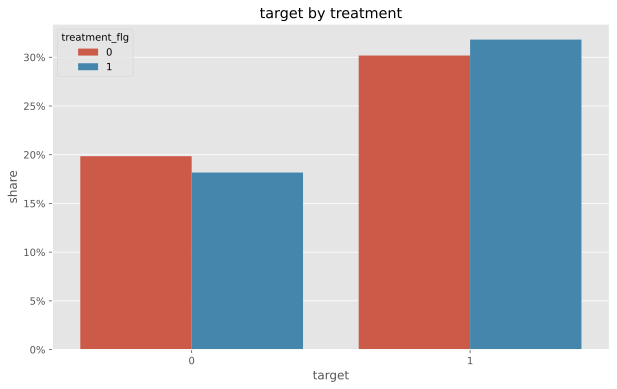

In [24]:
fig, ax = plt.subplots()

df.groupby(["treatment_flg", "target"], as_index=False).size().assign(share=lambda x: x["size"] / x["size"].sum()) \
  .pipe((sns.barplot, "data"), x="target", y="share", hue="treatment_flg", ax=ax)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{y :.0%}"))
ax.set(title="target by treatment");

treatment está praticamente balanceado, porém o target está levemente desbalanceado

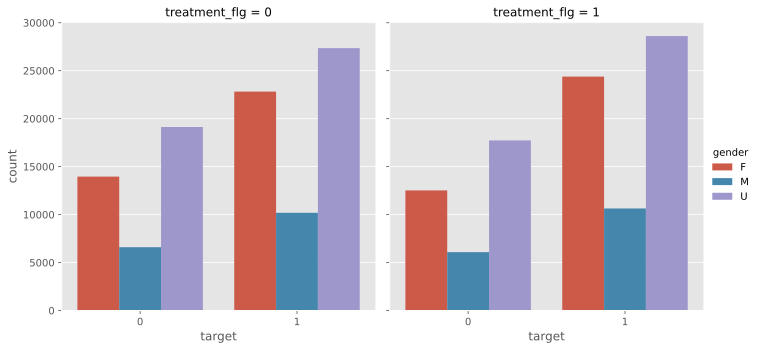

In [27]:
g = (
    df.query("target.notnull()")
    .groupby(["treatment_flg", "target", "gender"], as_index=False)
    .agg(count=("client_id", "count"))
    .pipe(
        (sns.catplot, "data"),
        x="target",
        y="count",
        hue="gender",
        col="treatment_flg",
        kind="bar",
    )
)

In [36]:
# para idade, vamos analisar excluindo os outliers. depois poderemos avaliar melhor como iremos tratar esses casos
age_outliers = df.loc[(df['age']<10) | (df['age'] > 100)]

In [35]:
df.loc[df['age'] > 100]

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
5,000220a0a7,0,1,2017-12-09 17:26:20,2018-10-04 14:59:29,115,M,2019-03-12 16:44:43 UTC,15,1.647059,5,70,104.1,0,0,0,8606.57
47,000d599743,0,0,2018-08-29 09:08:39,NaN,959,U,2019-03-08 08:25:13 UTC,7,0.982143,2,50,23.5,0,0,0,3413.66
882,0130b696fe,1,1,2018-07-29 21:25:26,2018-09-27 21:24:14,119,M,2019-03-08 19:09:17 UTC,16,1.090909,1,67,17.2,0,-41,0,3598.33
1179,018eab4dfe,0,0,2017-09-02 12:06:14,2018-06-11 10:50:37,108,U,2019-03-10 05:36:03 UTC,9,1.227642,3,104,83.9,0,-148,0,8667.29
1265,01a8fcf7e6,0,0,2017-06-15 13:45:33,2017-10-06 12:20:46,119,U,2019-02-25 09:05:51 UTC,2,1.000000,1,4,0.6,0,0,-30,161.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198736,fe588e100f,1,1,2018-01-10 12:39:02,2019-08-18 10:49:28,115,M,2019-03-17 10:51:51 UTC,7,1.435897,3,32,74.0,0,0,0,2609.00
198928,fe9c17328e,1,1,2018-05-19 14:43:23,2018-09-25 18:24:33,931,U,2019-03-15 15:11:48 UTC,27,0.812950,1,100,67.8,0,-85,-30,9368.92
199500,ff4fadac9f,1,1,2017-04-12 16:37:40,2018-12-05 18:41:35,115,M,2019-03-10 09:23:43 UTC,8,1.086957,3,39,24.4,0,-190,0,3400.00
199557,ff6614ddd4,1,1,2018-12-02 22:41:58,2019-02-08 13:47:56,119,U,2019-02-26 16:18:55 UTC,41,1.010381,3,139,179.3,0,-155,0,19050.35


In [41]:
print(f''' Quantidade de linhas com idades "outliers": {age_outliers.shape[0]/df.shape[0]: 0.2%} ''')

 Quantidade de linhas com idades "outliers":  0.35% 


In [43]:
df1 = df.loc[(df['age']>10) & (df['age'] < 100)]


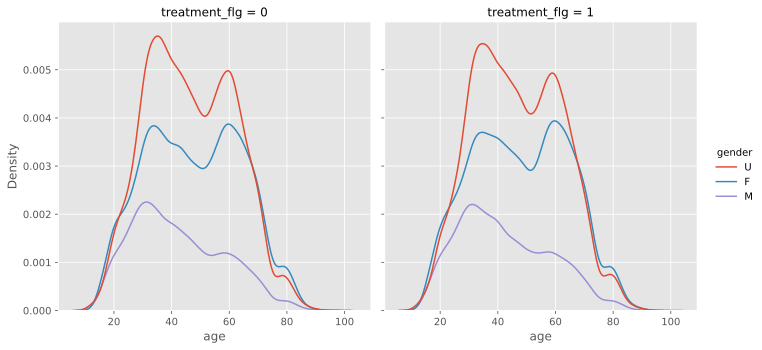

In [50]:
df1.query('target.notnull()').pipe((sns.displot, "data"), x="age", hue="gender", col="treatment_flg", kind='kde')

## 1.2 Análise de dados faltantes

Temos a coluna first_redeem_date com bastante dados faltantes, precisamos investigar porque isso acontece

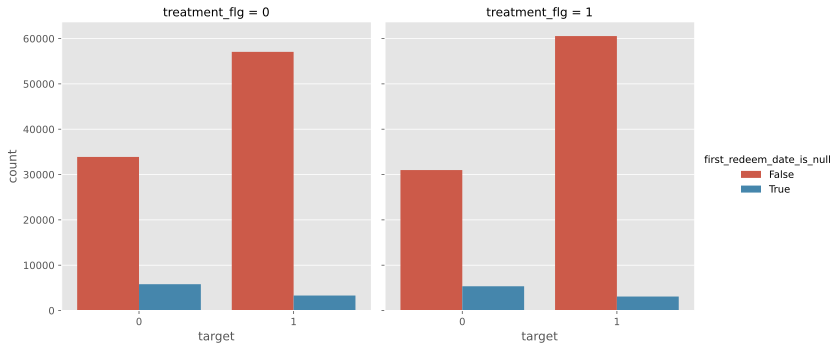

In [53]:
g = (
    df.assign(
        first_redeem_date_is_null=lambda x: x["first_redeem_date"].isna()
    )
    .groupby(
      ["treatment_flg", "target", "first_redeem_date_is_null"], as_index=False
    )
    .agg(count=("client_id", "count"))
    .pipe(
        (sns.catplot, "data"),
        x="target",
        y="count",
        hue="first_redeem_date_is_null",
        col="treatment_flg",
        kind="bar",
    )
)

In [57]:
df.dtypes

client_id                     object
treatment_flg                  int64
target                         int64
first_issue_date              object
first_redeem_date             object
age                            int64
gender                        object
last_transaction_datetime     object
n_transactions                 int64
mean_product_quantity        float64
n_stores                       int64
n_products                     int64
regular_points_received      float64
express_points_received        int64
regular_points_spent           int64
express_points_spent           int64
total_amount_spent           float64
dtype: object

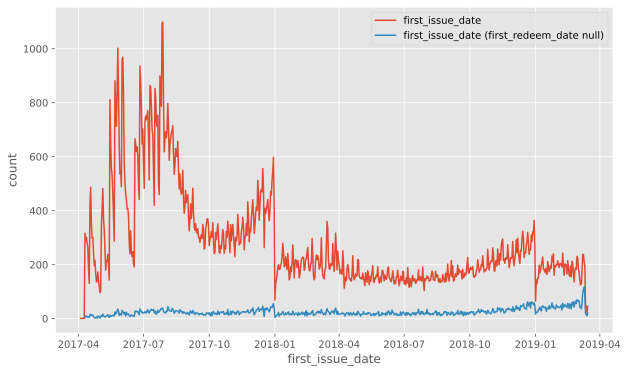

In [64]:
fig, ax = plt.subplots()

df \
  .assign(first_issue_date=lambda x: x["first_issue_date"].dt.date) \
  .groupby(
    ["first_issue_date"], as_index=False
  ) \
  .agg(count=("client_id", "count")) \
  .pipe(
    (sns.lineplot, "data"),
    x="first_issue_date",
    y="count",
    label="first_issue_date",
    ax=ax,
)

df \
  .query("first_redeem_date.isnull()") \
  .assign(
    first_issue_date=lambda x: x["first_issue_date"].dt.date
  ) \
  .groupby(["first_issue_date"], as_index=False) \
  .agg(count=("client_id", "count")) \
  .pipe(
    (sns.lineplot, "data"),
    x="first_issue_date",
    y="count",
    label="first_issue_date (first_redeem_date null)",
    ax=ax,
);

O first redeem vem vazio desde o início. Será que acontece de forma aleatória? Será que essas pessoas nunca resgataram seus cupons/pontos? \
Se estivéssemos na empresa, o passo seria entrar em contato com as áreas de negócio e/ou produto para entender o comportamento dessas variáveis

In [78]:
df.query('first_redeem_date.notnull() & regular_points_spent == 0')

,client_id,treatment_flg,target,first_issue_date,first_redeem_date,age,gender,last_transaction_datetime,n_transactions,mean_product_quantity,n_stores,n_products,regular_points_received,express_points_received,regular_points_spent,express_points_spent,total_amount_spent
0,000012768d,0,1,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,2019-03-14 15:01:47+00:00,4,1.038462,3,46,25.7,0,0,0,2803.00
1,000036f903,1,1,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F,2019-03-17 10:29:37+00:00,32,1.043210,5,96,54.9,60,0,0,9805.00
3,0001f552b0,1,1,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F,2019-03-16 10:54:02+00:00,15,1.232558,4,79,78.9,0,0,0,6155.18
5,000220a0a7,0,1,2017-12-09 17:26:20,2018-10-04 14:59:29,115,M,2019-03-12 16:44:43+00:00,15,1.647059,5,70,104.1,0,0,0,8606.57
7,0002ce2217,0,1,2017-07-26 17:40:17,2017-09-09 17:45:57,38,U,2019-03-17 09:31:56+00:00,13,1.250000,5,57,22.5,0,0,0,3305.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200028,fffc2e37ab,0,1,2019-02-28 16:29:56,2019-05-27 13:22:12,20,U,2019-02-28 13:29:56+00:00,1,1.523810,1,21,12.8,0,0,0,1282.00
200031,fffd5cd0c6,1,1,2017-06-26 18:23:15,2018-09-23 18:40:26,47,M,2019-03-18 15:17:33+00:00,18,1.190000,2,76,35.1,0,0,0,5731.63
200032,fffd63dfe3,1,1,2017-05-26 18:34:06,2018-02-16 17:59:55,31,U,2019-03-13 08:54:48+00:00,4,1.240000,2,23,6.5,0,0,0,1340.51
200033,fffd8c9d7d,1,0,2018-02-20 13:40:04,2018-06-30 20:02:51,48,F,2019-03-08 13:06:17+00:00,5,1.350000,2,15,11.0,0,0,0,1636.53


In [ ]:
df.query('first_redeem_date.isnull').groupby(['regular_points_received'], as_index=False)\
.agg(count=('client_id', 'count'))\
.pipe((sns.catplot, 'data'), x

[Text(0.5, 0, 'date'), Text(0, 0.5, 'count')]

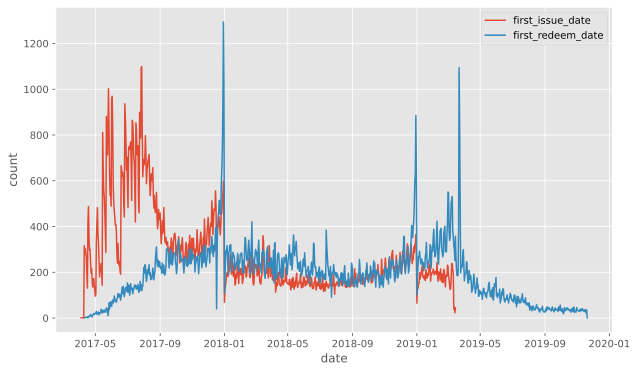

In [66]:
fig, ax = plt.subplots()

df \
  .assign(first_issue_date=lambda x: x["first_issue_date"].dt.date) \
  .groupby(["first_issue_date"], as_index=False) \
  .agg(count=("client_id", "count")) \
  .pipe((sns.lineplot, "data"),
    x="first_issue_date",
    y="count",
    label="first_issue_date",
    ax=ax,
)

df \
  .assign(first_redeem_date=lambda x: x["first_redeem_date"].dt.date) \
  .groupby(["first_redeem_date"], as_index=False) \
  .agg(count=("client_id", "count")) \
  .pipe((sns.lineplot, "data"),
    x="first_redeem_date",
    y="count",
    label="first_redeem_date",
    ax=ax,
)
ax.set(xlabel="date", ylabel="count")